In [2]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [12]:
bit_strings = [f"{x:0{3}b}" for x in range(8)]

In [7]:
# the density matrix to swap test to discern unique values
dev2 = qml.device('default.qubit', wires=9)

@qml.qnode(dev2)
def cswap(arr):
    # input state
    coeff = np.sqrt(np.ones(len(arr[0]))/len(arr[0]))
    base = np.array(arr[0])
    qml.Superposition(coeff, base, wires=[1,2,3], work_wire=4)
    # ref state
    coeff = np.sqrt(np.ones(len(arr[1]))/len(arr[1]))
    base = np.array(arr[1])
    qml.Superposition(coeff, base, wires=[5,6,7], work_wire=8)
    
    qml.Hadamard(0)
    qml.CSWAP([0,1,5])
    qml.CSWAP([0,2,6])
    qml.CSWAP([0,3,7])
    
    qml.Hadamard(0)

    qml.Barrier(range(9))
    qml.measure(4)
    qml.measure(8)

    
    return qml.probs(0)

test_arr = [[[0,0,0],[0,0,1],[0,1,0],[1,0,0],[1,1,1]],[[0,0,0], [0,1,1], [1,0,1], [1,1,0], [1,1,1]]]
cswap(test_arr)

array([0.58, 0.42])

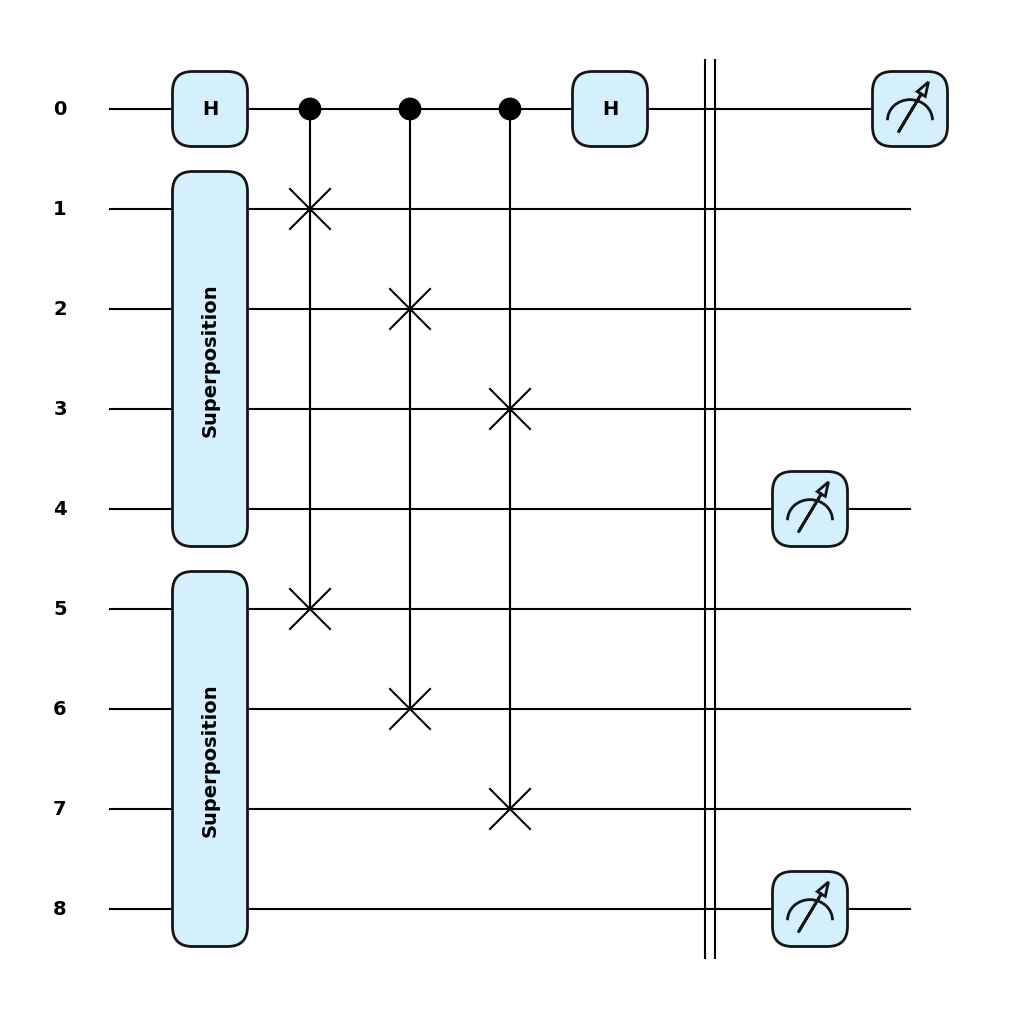

In [8]:
fig, _ = qml.draw_mpl(cswap, style="pennylane", show_all_wires=True)(test_arr)
plt.show()

In [9]:
# the density matrix to swap test to discern unique values
dev2 = qml.device('default.qubit', wires=9)

@qml.qnode(dev2)
def GroverSearch(arr, iter=1):
    # input state
    coeff = np.sqrt(np.ones(len(arr[0]))/len(arr[0]))
    base = np.array(arr[0])
    qml.Superposition(coeff, base, wires=[1,2,3], work_wire=4)
    # ref state
    coeff = np.sqrt(np.ones(len(arr[1]))/len(arr[1]))
    base = np.array(arr[1])
    qml.Superposition(coeff, base, wires=[5,6,7], work_wire=8)
    
    qml.Hadamard(0)
    qml.CSWAP([0,1,5])
    qml.CSWAP([0,2,6])
    qml.CSWAP([0,3,7])
    
    qml.Hadamard(0)
    p = qml.measure(0)

    qml.Barrier(range(9))
    qml.measure(4)
    qml.measure(8)
    
    for _ in range(iter):
        qml.FlipSign([0,0,0], wires=[5,6,7])
        qml.FlipSign([0,0,1], wires=[5,6,7])
        qml.FlipSign([0,1,0], wires=[5,6,7])
        qml.FlipSign([1,0,0], wires=[5,6,7])
        qml.FlipSign([1,1,1], wires=[5,6,7])
        qml.templates.GroverOperator(wires=[5,6,7])

    return qml.probs(op=p), qml.probs([5,6,7])

test_arr = [[[0,0,0],[0,0,1],[0,1,0],[1,0,0],[1,1,1]],[[0,0,0], [0,1,1], [1,0,1],[1,1,0],[1,1,1]]] # 
GroverSearch(test_arr)

(array([0.58, 0.42]),
 array([0.1625, 0.0125, 0.0125, 0.2125, 0.0125, 0.2125, 0.2125, 0.1625]))

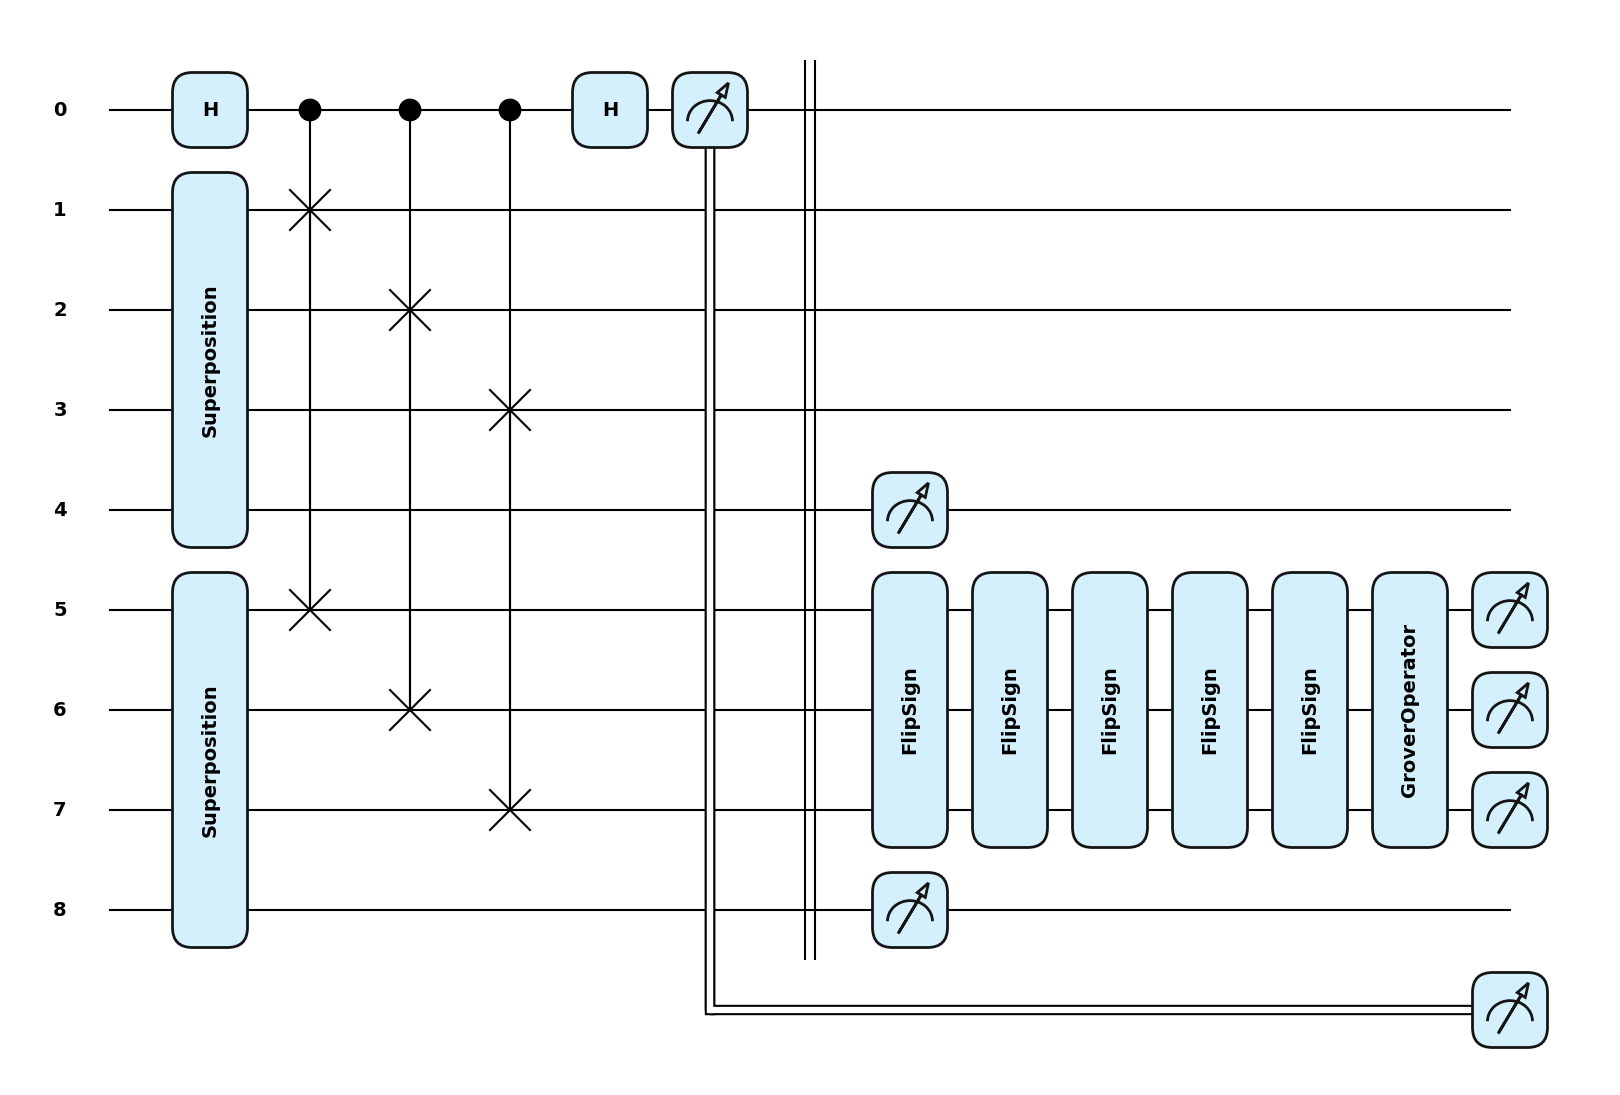

In [10]:
fig, _ = qml.draw_mpl(GroverSearch, style="pennylane", show_all_wires=True)(test_arr)
plt.show()

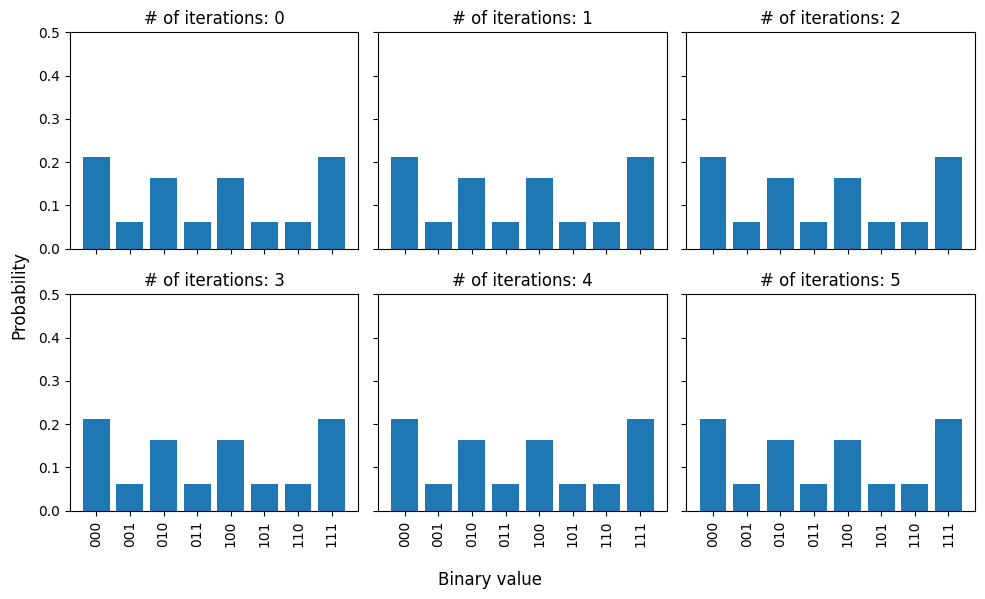

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6), sharex=True, sharey=True)

for i, ax in enumerate(axes.flat):  # Flatten the 2D array of axes
    probabilities = GroverSearch(test_arr, iter=i)[1]
    ax.bar(bit_strings, probabilities)
    # ax.set_xlabel("Binary value")
    # ax.set_ylabel("Probability")
    ax.set_xticks(range(len(bit_strings)))  # Set tick locations
    ax.set_xticklabels(bit_strings, rotation="vertical")  # Rotate labels
    ax.set_ylim([0,0.5])
    ax.set_title(f'# of iterations: {i}')
fig.supxlabel("Binary value")
fig.supylabel("Probability")
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [18]:
fig.savefig('grover_result_ext.png')

In [19]:
# the density matrix to swap test to discern unique values
dev2 = qml.device('default.qubit', wires=13)

@qml.qnode(dev2)
def GroverSearch(arr, iter=1):
    # input state
    coeff = np.sqrt(np.ones(len(arr[0]))/len(arr[0]))
    base = np.array(arr[0])
    qml.Superposition(coeff, base, wires=[1,2,3], work_wire=4)
    # ref state
    coeff = np.sqrt(np.ones(len(arr[1]))/len(arr[1]))
    base = np.array(arr[1])
    qml.Superposition(coeff, base, wires=[5,6,7], work_wire=8)
    qml.Superposition(coeff, base, wires=[9,10,11], work_wire=12)
    
    qml.Hadamard(0)
    qml.CSWAP([0,1,5])
    qml.CSWAP([0,2,6])
    qml.CSWAP([0,3,7])
    
    qml.Hadamard(0)
    p = qml.measure(0)

    # qml.Barrier(range(9))
    qml.measure(4)
    qml.measure(8)
    
    for _ in range(1): #4
        qml.FlipSign([0,0,0], wires=[5,6,7])
        qml.FlipSign([0,0,1], wires=[5,6,7])
        qml.FlipSign([1,1,1], wires=[5,6,7])
        qml.templates.GroverOperator(wires=[5,6,7])

    q1 = qml.measure(5)
    q2 = qml.measure(6)
    q3 = qml.measure(7)
    q = [q1, q2, q3]
    qml.Barrier(range(13))

    # Grover excluding the intersection
    for _ in range(1): #6
        qml.FlipSign([0,0,1], wires=[1,2,3])
        qml.FlipSign([0,1,0], wires=[1,2,3])
        qml.FlipSign([1,0,0], wires=[1,2,3])
        qml.templates.GroverOperator(wires=[1,2,3])

    # Grover excluding the intersection - not applicable if B is unveiled
    for _ in range(1): #2
        qml.FlipSign([0,1,1], wires=[9,10,11])
        qml.FlipSign([1,0,1], wires=[9,10,11])
        qml.FlipSign([1,1,0], wires=[9,10,11])
        qml.templates.GroverOperator(wires=[9,10,11])
        
    return qml.probs(op=p), qml.probs(op=q), qml.probs([1,2,3]), qml.probs([9,10,11])

test_arr = [[[0,0,0],[0,0,1],[0,1,0],[1,0,0],[1,1,1]],[[0,0,0], [0,1,1], [1,0,1], [1,1,0], [1,1,1]]]
GroverSearch(test_arr)

(array([0.58, 0.42]),
 array([0.2125, 0.0625, 0.1625, 0.0625, 0.1625, 0.0625, 0.0625, 0.2125]),
 array([0.1625, 0.2125, 0.2125, 0.0125, 0.2125, 0.0125, 0.0125, 0.1625]),
 array([0.3125, 0.0125, 0.0125, 0.1125, 0.0125, 0.1125, 0.1125, 0.3125]))

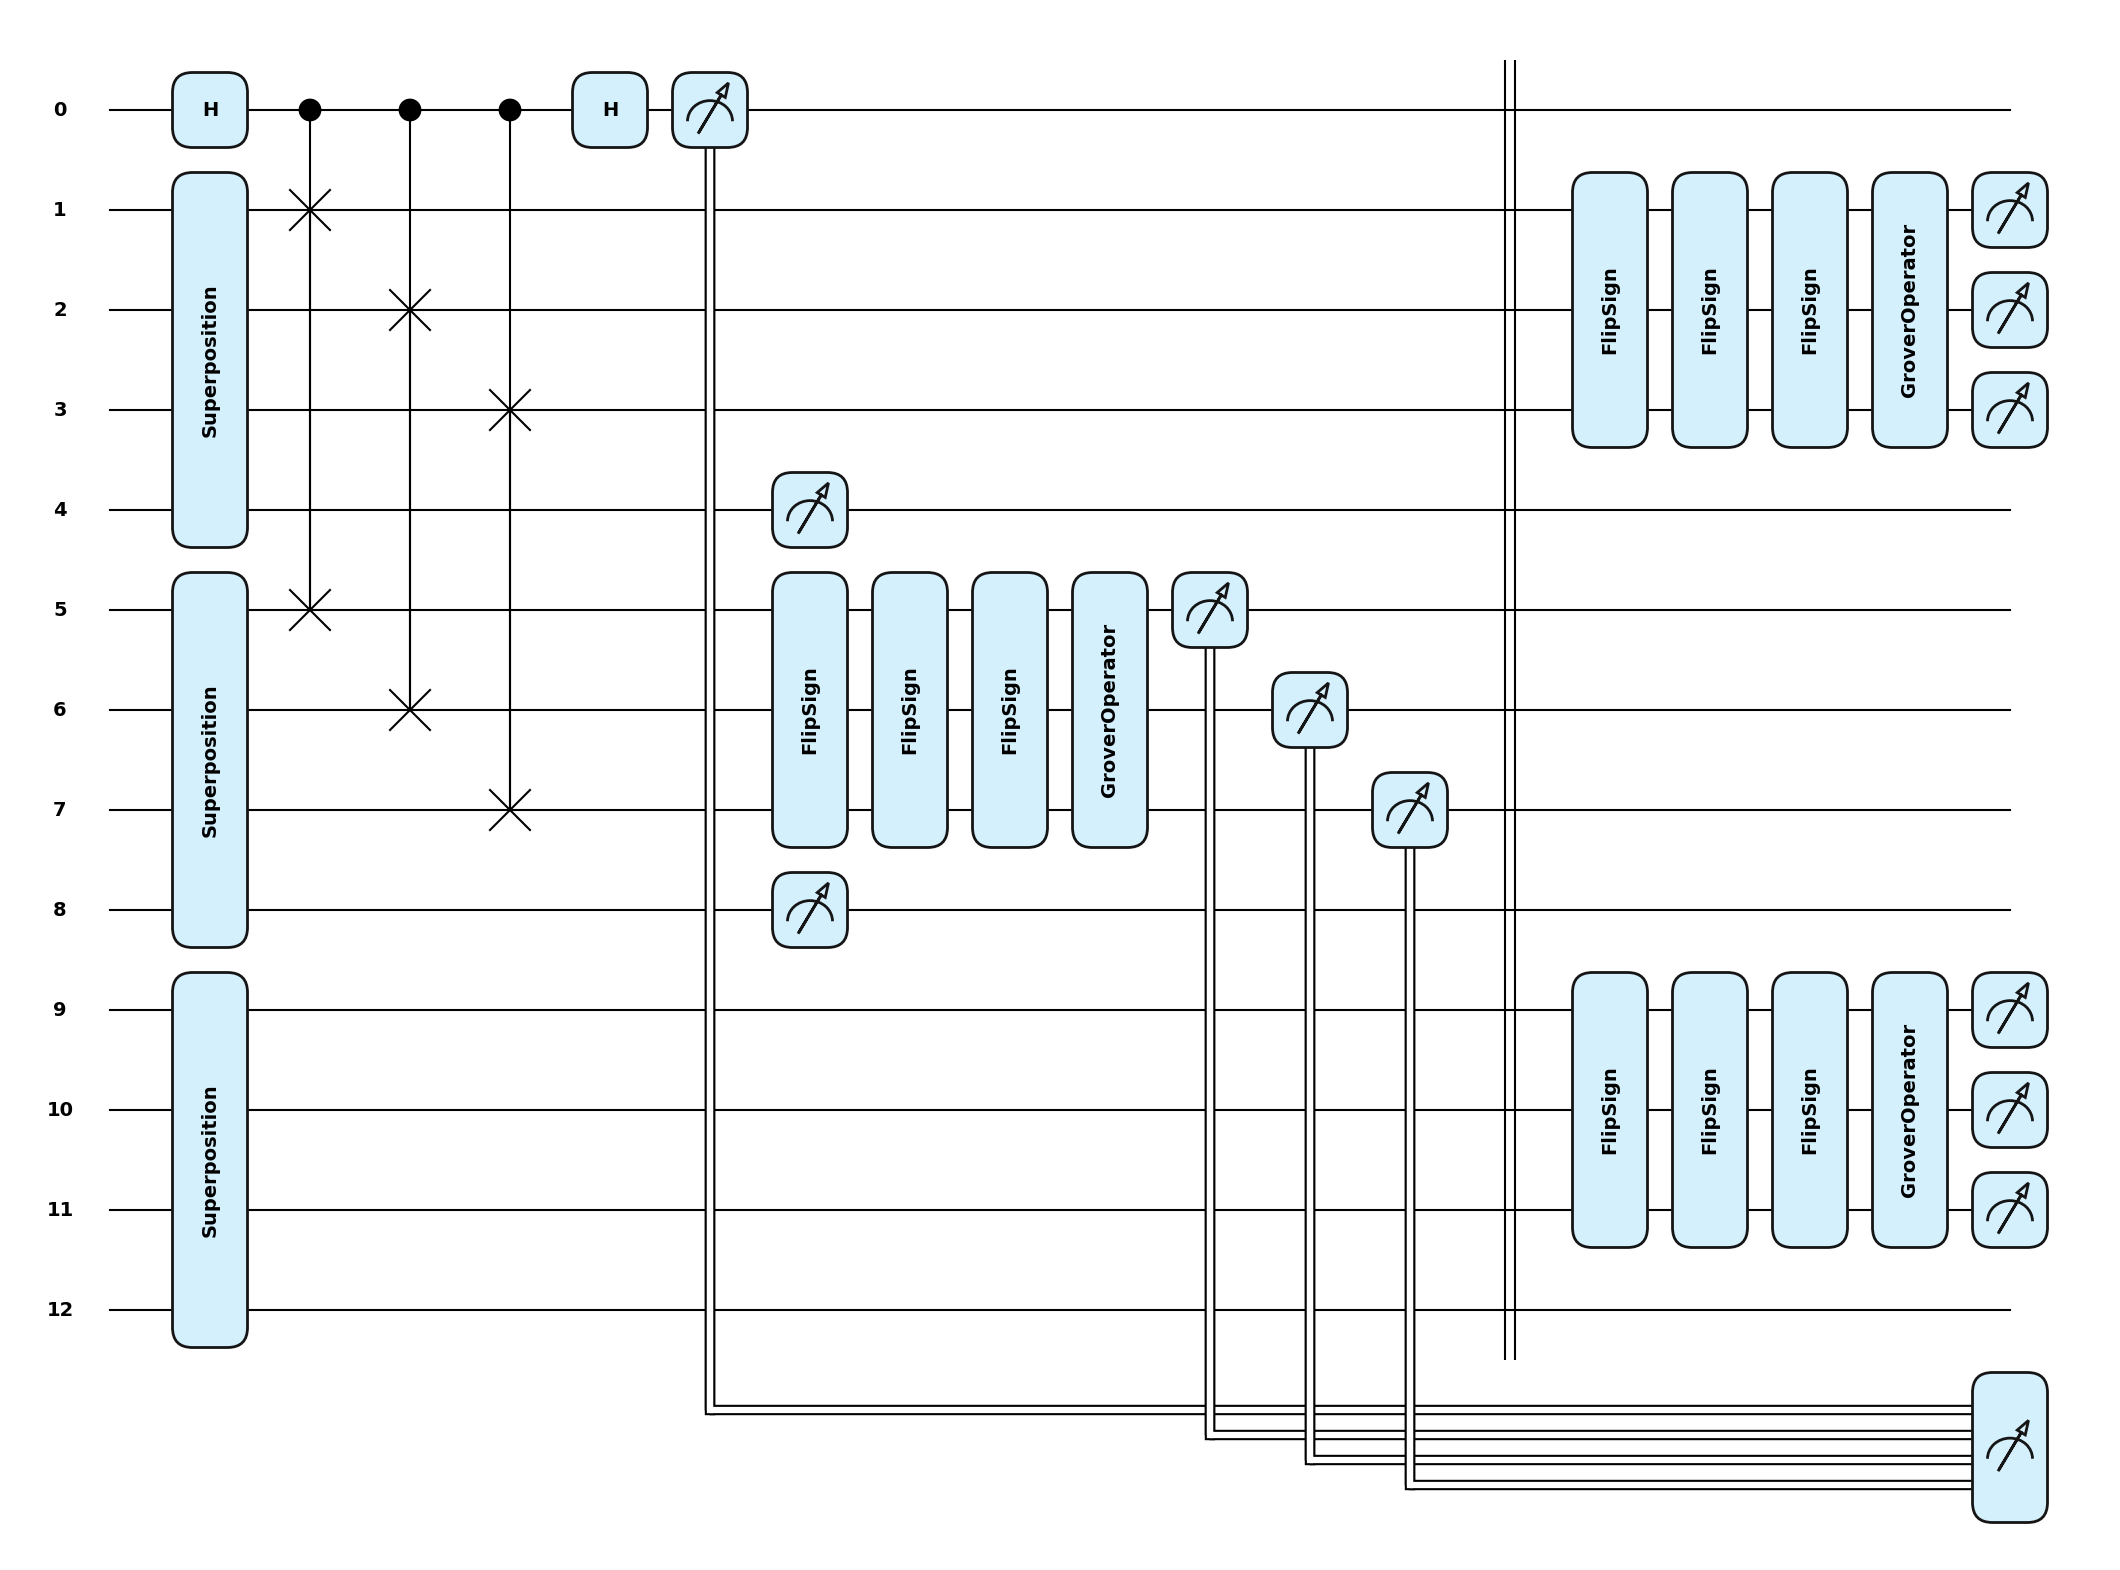

In [20]:
fig, _ = qml.draw_mpl(GroverSearch, style="pennylane", show_all_wires=True)(test_arr)
plt.show()

In [223]:
fig.savefig('set_operation_grover1.png')

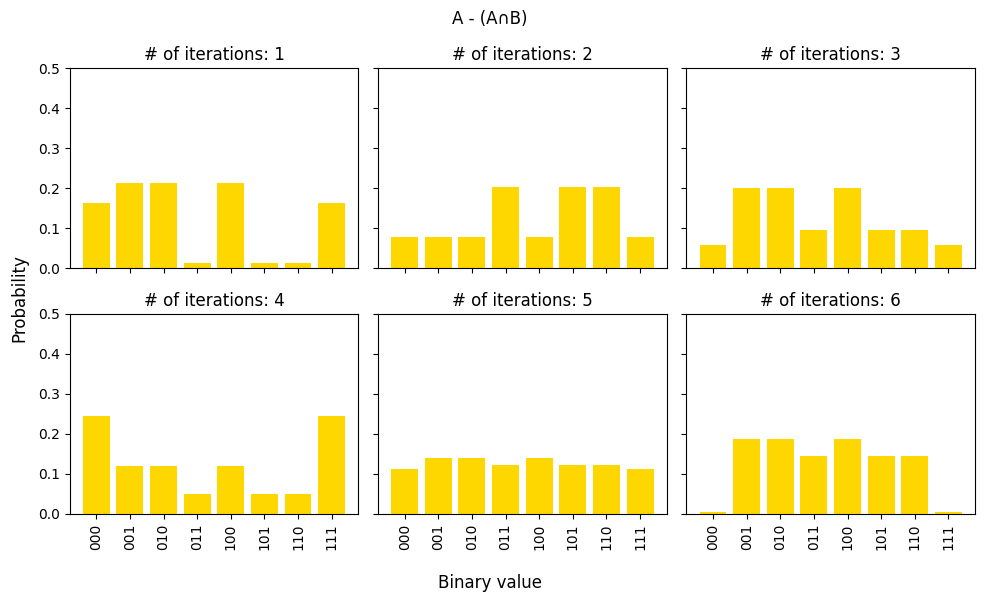

In [200]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6), sharex=True, sharey=True)

for i, ax in enumerate(axes.flat):  # Flatten the 2D array of axes
    probabilities = GroverSearch(test_arr, iter=i+1)[1]
    ax.bar(bit_strings, probabilities, color='gold')
    # ax.set_xlabel("Binary value")
    # ax.set_ylabel("Probability")
    ax.set_xticks(range(len(bit_strings)))  # Set tick locations
    ax.set_xticklabels(bit_strings, rotation="vertical")  # Rotate labels
    ax.set_ylim([0,0.5])
    ax.set_title(f'# of iterations: {i+1}')
fig.suptitle("A - (A∩B)")
fig.supxlabel("Binary value")
fig.supylabel("Probability")
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [201]:
fig.savefig('grover1.png')

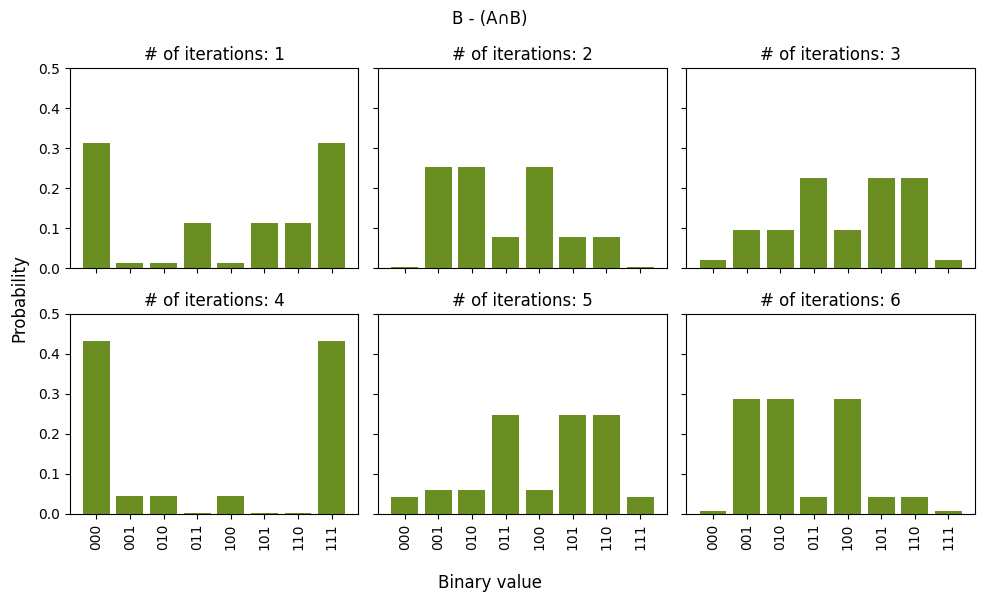

In [214]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6), sharex=True, sharey=True)

for i, ax in enumerate(axes.flat):  # Flatten the 2D array of axes
    probabilities = GroverSearch(test_arr, iter=i+1)[2]
    ax.bar(bit_strings, probabilities, color='olivedrab')
    # ax.set_xlabel("Binary value")
    # ax.set_ylabel("Probability")
    ax.set_xticks(range(len(bit_strings)))  # Set tick locations
    ax.set_xticklabels(bit_strings, rotation="vertical")  # Rotate labels
    ax.set_ylim([0,0.5])
    ax.set_title(f'# of iterations: {i+1}')
fig.suptitle("B - (A∩B)")
fig.supxlabel("Binary value")
fig.supylabel("Probability")
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [215]:
fig.savefig('grover3.png')

In [ ]:
# the density matrix to swap test to discern unique values
dev2 = qml.device('default.qubit', wires=13)

@qml.qnode(dev2)
def GroverSearch(arr, iter=1):
    # input state
    coeff = np.sqrt(np.ones(len(arr[0]))/len(arr[0]))
    base = np.array(arr[0])
    qml.Superposition(coeff, base, wires=[1,2,3], work_wire=4)
    # ref state
    coeff = np.sqrt(np.ones(len(arr[1]))/len(arr[1]))
    base = np.array(arr[1])
    qml.Superposition(coeff, base, wires=[5,6,7], work_wire=8)
    
    qml.Hadamard(0)
    qml.CSWAP([0,1,5])
    qml.CSWAP([0,2,6])
    qml.CSWAP([0,3,7])
    
    qml.Hadamard(0)
    p = qml.measure(0)

    # qml.Barrier(range(9))
    qml.measure(4)
    qml.measure(8)
    
    for _ in range(1): #4
        qml.FlipSign([0,0,0], wires=[5,6,7])
        qml.FlipSign([0,0,1], wires=[5,6,7])
        qml.FlipSign([0,1,0], wires=[5,6,7])
        qml.FlipSign([1,0,0], wires=[5,6,7])
        qml.FlipSign([1,1,1], wires=[5,6,7])
        qml.templates.GroverOperator(wires=[5,6,7])

    qml.measure(5)
    qml.measure(6)
    qml.measure(7)
    qml.Barrier(range(13))
    
    # intersection
    # intersection = [[0,0,0],[1,1,1]]
    # coeff = np.sqrt(np.ones(len(intersection))/len(intersection))
    # base = np.array(intersection)
    # qml.Superposition(coeff, base, wires=[5,6,7], work_wire=8)

    # B copy
    coeff = np.sqrt(np.ones(len(arr[1]))/len(arr[1]))
    base = np.array(arr[1])
    qml.Superposition(coeff, base, wires=[9,10,11], work_wire=12)

    # Grover excluding the intersection
    for _ in range(1): #6
        qml.FlipSign([0,0,1], wires=[1,2,3])
        qml.FlipSign([0,1,0], wires=[1,2,3])
        qml.FlipSign([1,0,0], wires=[1,2,3])
        qml.templates.GroverOperator(wires=[1,2,3])

    # Grover excluding the intersection
    for _ in range(1): #2
        qml.FlipSign([0,1,1], wires=[9,10,11])
        qml.FlipSign([1,0,1], wires=[9,10,11])
        qml.FlipSign([1,1,0], wires=[9,10,11])
        qml.templates.GroverOperator(wires=[9,10,11])
        
    return qml.probs(op=p), qml.probs([1,2,3]),  qml.probs([5,6,7]), qml.probs([9,10,11])

test_arr = [[[0,0,0],[0,0,1],[0,1,0],[1,0,0],[1,1,1]],[[0,0,0], [0,1,1], [1,0,1], [1,1,0], [1,1,1]]]
GroverSearch(test_arr)